In [1]:
import sys
sys.path.append('/Users/yuntongzhou/Desktop/Dihiggszztt/HHtobbtautau/src')

In [2]:
from learning.classifier import PrelimLoader, SimpleClassifier

In [3]:
dl = PrelimLoader(file_path='/Users/yuntongzhou/Desktop/Dihiggszztt/output/hadded/prelim/datasource/processed.csv',
                target_column=['LeadingTau_charge', 'SubleadingTau_charge'])

In [4]:
dl.data['OS'] = (dl.data['LeadingTau_charge'] * dl.data['SubleadingTau_charge'] < 0).astype(int) 

In [8]:
len(dl.data[dl.data['OS'] == 0])

2824

In [10]:
2824/60083

0.04700164772065309

In [5]:
kept = ['pt', 'eta', 'mass', 'phi', 'dxy', 'dz', 'OS', 'process']
filtered = [col for col in dl.data.columns if any(k in col for k in kept)]
dl.data = dl.data[filtered]

In [6]:
signal = ['ZH', 'HH', 'ZZ']

In [8]:
bkgonly = dl.data[~dl.data['process'].isin(signal)]

In [9]:
dl.data = bkgonly
dl.data.drop(columns=['process'], inplace=True)

In [10]:
dl.target_column = 'OS'

In [17]:
dl.preprocess_data()
dl.split_data()

In [18]:
scl = SimpleClassifier()

/Users/yuntongzhou/miniconda3/lib/python3.10/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
scl.fit(dl.X_train, dl.y_train)

Epoch [1/50], Loss: 0.0613
Epoch [2/50], Loss: 0.0441
Epoch [3/50], Loss: 0.3429
Epoch [4/50], Loss: 0.5635
Epoch [5/50], Loss: 0.1898
Epoch [6/50], Loss: 0.1884
Epoch [7/50], Loss: 0.1924
Epoch [8/50], Loss: 0.3185
Epoch [9/50], Loss: 0.1918
Epoch [10/50], Loss: 0.0579
Epoch [11/50], Loss: 0.1761
Epoch [12/50], Loss: 0.2589
Epoch [13/50], Loss: 0.1595
Epoch [14/50], Loss: 0.1641
Epoch [15/50], Loss: 0.3144
Epoch [16/50], Loss: 0.0415
Epoch [17/50], Loss: 0.1203
Epoch [18/50], Loss: 0.2950
Epoch [19/50], Loss: 0.1976
Epoch [20/50], Loss: 0.1508
Epoch [21/50], Loss: 0.1782
Epoch [22/50], Loss: 0.0351
Epoch [23/50], Loss: 0.4485
Epoch [24/50], Loss: 0.1628
Epoch [25/50], Loss: 0.0439
Epoch [26/50], Loss: 0.0442
Epoch [27/50], Loss: 0.0423
Epoch [28/50], Loss: 0.5993
Epoch [29/50], Loss: 0.1647
Epoch [30/50], Loss: 0.1929
Epoch [31/50], Loss: 0.1279
Epoch [32/50], Loss: 0.1015
Epoch [33/50], Loss: 0.1352
Epoch [34/50], Loss: 0.0303
Epoch [35/50], Loss: 0.5180
Epoch [36/50], Loss: 0.0454
E

In [21]:
scl.evaluate(dl.X_test, dl.y_test)

Test Accuracy: 0.9532


In [31]:
len(dl.y_test)

18004

In [22]:
dl.X_test[0]

array([-0.78880923,  1.17879103, -0.84845687, -0.46936979, -1.95033246,
        2.29101572, -0.46340426,  0.4255006 , -0.17537876,  0.07351665,
        0.097406  , -0.05043032, -0.51599315,  2.38137468,  1.21537694,
       -0.81912303,  0.7155123 ,  0.85613599,  1.20738257,  0.60608411])

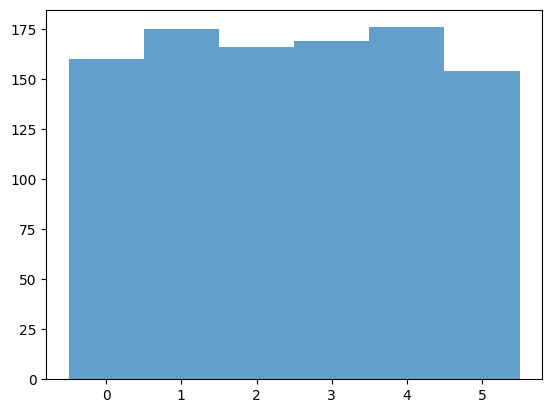

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Random data

data = np.random.randint(0, 6, 1000)

# Create histogram
hist, bin_edges = np.histogram(data, bins=6, range=(-0.5, 5.5))

# Plot histogram
plt.bar((bin_edges[:-1] + bin_edges[1:]) / 2, hist, width=1, alpha=0.7)
plt.show()